In [55]:
from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import (convex_hull_image, skeletonize, black_tophat)
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 450.5, 601.5, -0.5)

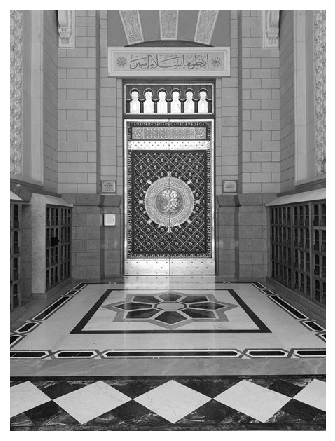

In [57]:
pic= io.imread('Picture1.jpg')
pic_grayscale= rgb2gray(pic)
io.imshow(pic_grayscale)
plt.axis('off')


In [58]:
def plot_comparison(original, processed, title_processed):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(processed, cmap='gray')
    ax2.set_title(title_processed)
    ax2.axis('off')
    plt.show()


def custom_shape():
    cs = np.array([
        [0, 0, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 0]
    ])
    
    return cs

custom_footprint = custom_shape()
print(custom_footprint)


[[0 0 1 1 1 0 0]
 [0 1 0 1 0 1 0]
 [1 0 0 1 0 0 1]
 [1 1 1 1 1 1 1]
 [1 0 0 1 0 0 1]
 [0 1 0 1 0 1 0]
 [0 0 1 1 1 0 0]]


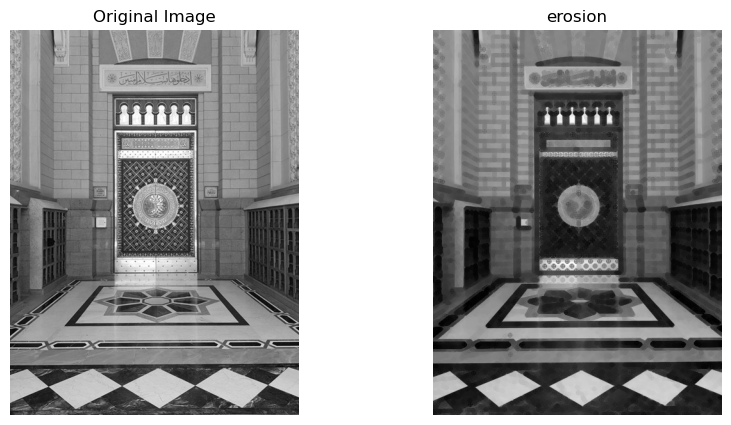

In [61]:
eroded= erosion(pic_grayscale, custom_shape())
plot_comparison(pic_grayscale, eroded, 'erosion')

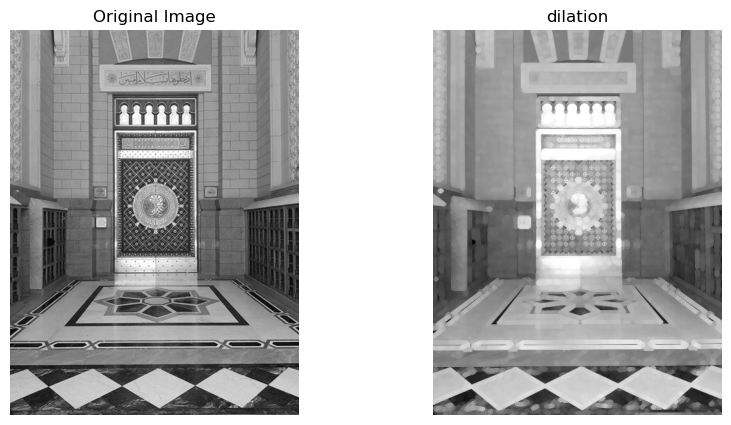

In [62]:
dilated= dilation(pic_grayscale, custom_shape())
plot_comparison(pic_grayscale, dilated, 'dilation')

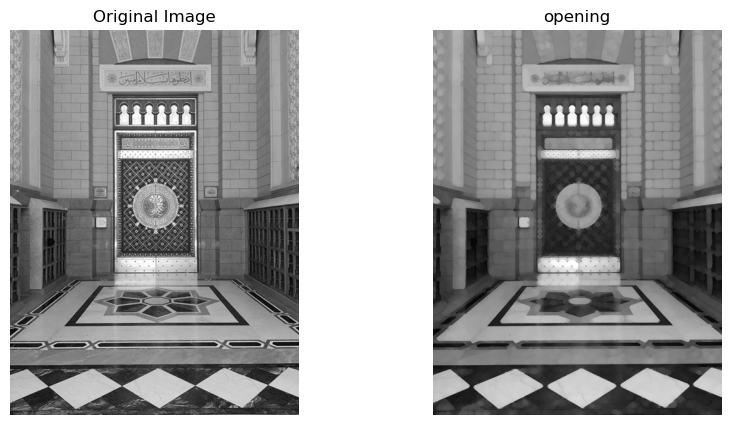

In [63]:
opened = opening(pic_grayscale, custom_shape())
plot_comparison(pic_grayscale, opened, 'opening')

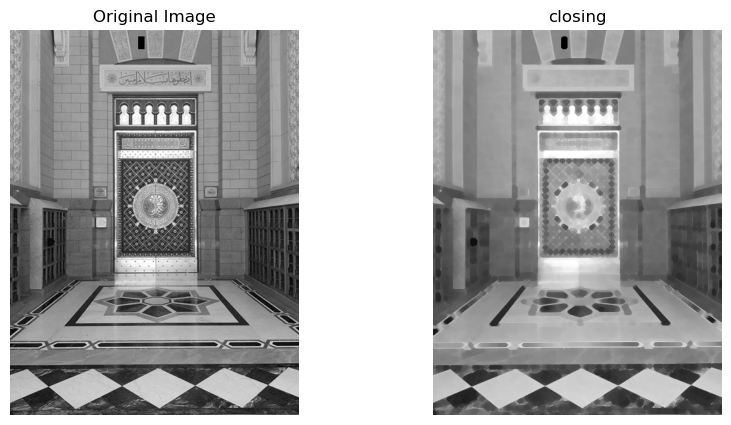

In [64]:
phantom = pic_grayscale.copy()
phantom[10:30,200:210]=0

closed = closing(phantom, custom_shape())
plot_comparison(phantom, closed, 'closing')

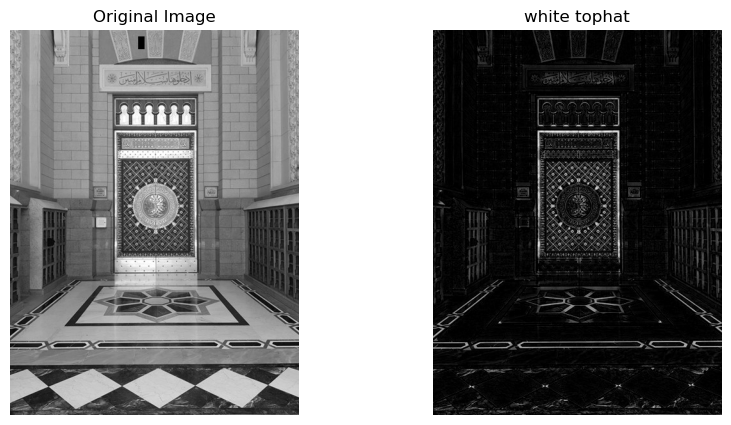

In [65]:
w_tophat = white_tophat(phantom, custom_shape())
plot_comparison(phantom, w_tophat, 'white tophat')

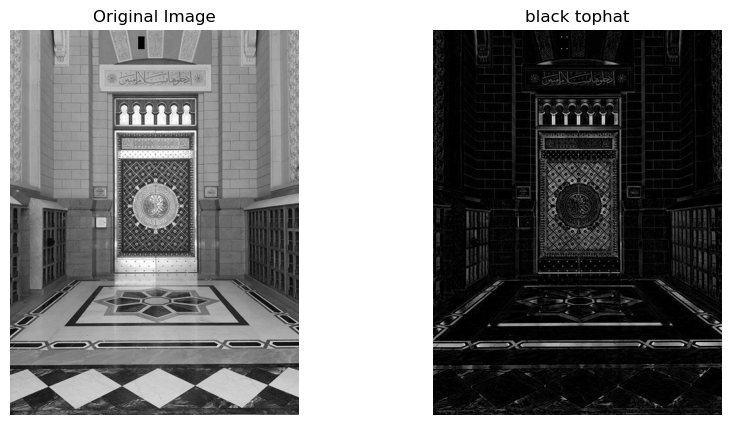

In [67]:
b_tophat = black_tophat(phantom, custom_shape())
plot_comparison(phantom, b_tophat, 'black tophat')

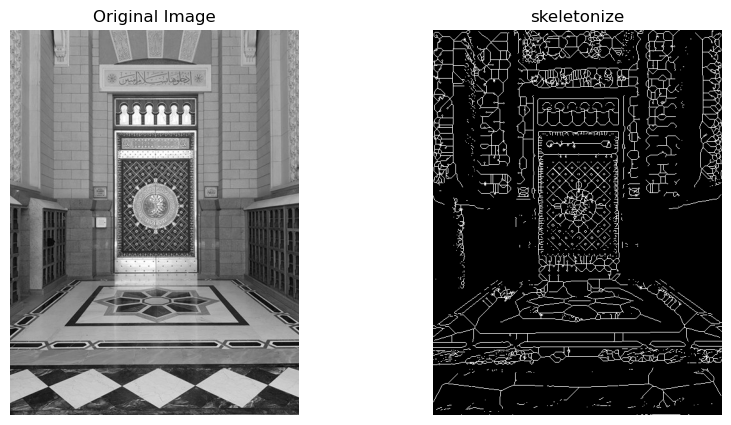

In [79]:
sk_pic= pic_grayscale.copy()

for i in range(sk_pic.shape[0]):
    for j in range(sk_pic.shape[1]):
        if sk_pic[i][j] > 0.5 :
            sk_pic[i][j]=1
        else:
            sk_pic[i][j]=0


sk= skeletonize(sk_pic)
plot_comparison(pic_grayscale, sk, 'skeletonize')

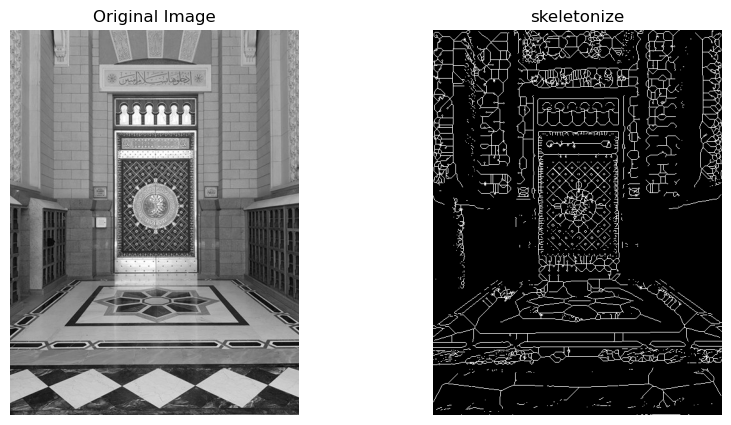

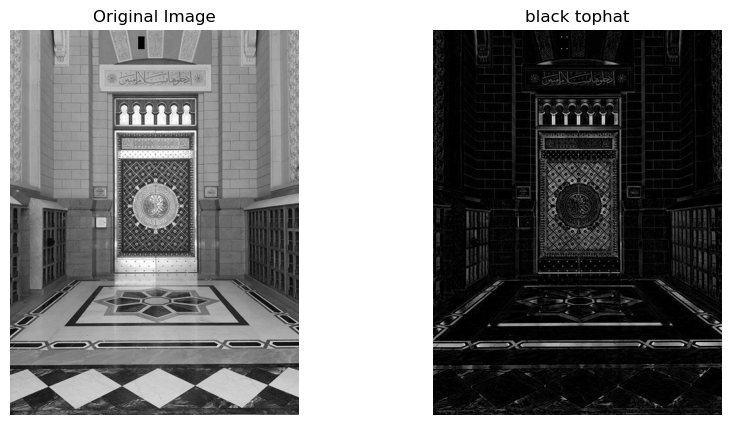

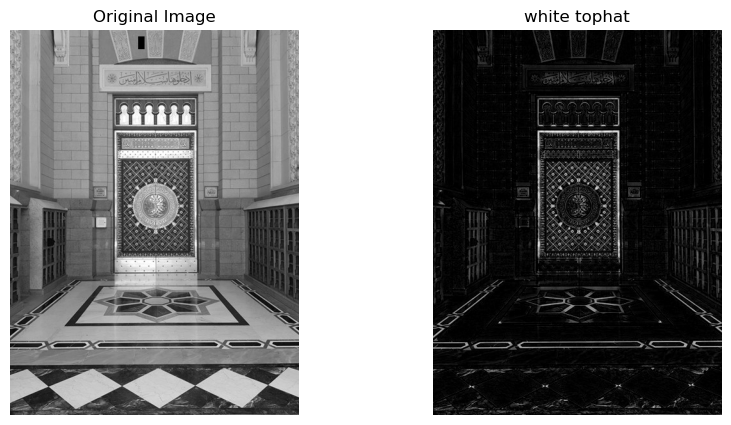

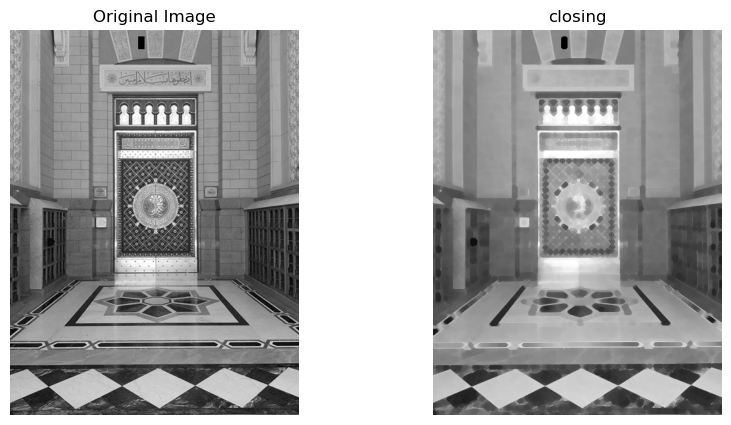

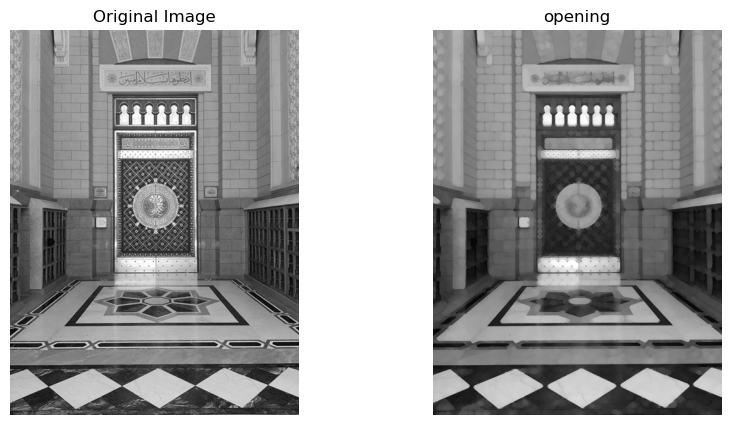

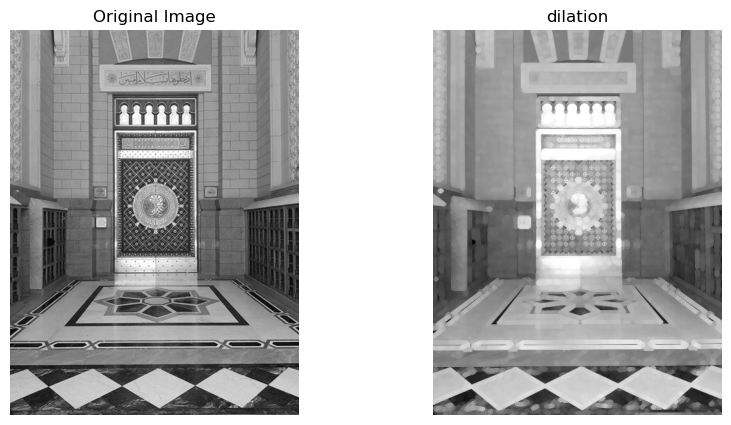

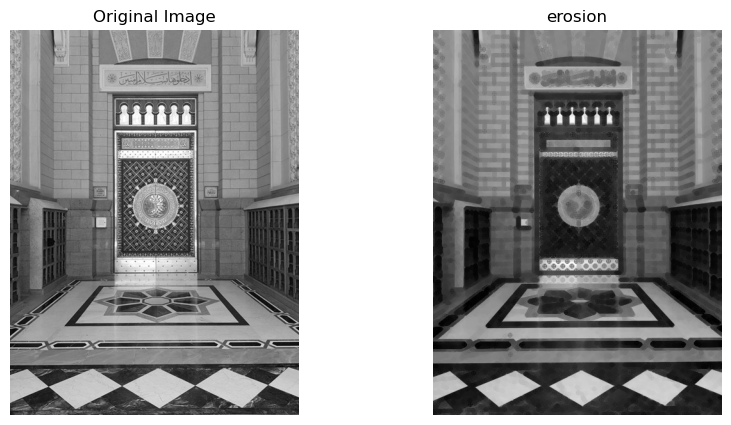

In [69]:
plot_comparison(pic_grayscale, sk, 'skeletonize')
plot_comparison(phantom, b_tophat, 'black tophat')
plot_comparison(phantom, w_tophat, 'white tophat')
plot_comparison(phantom, closed, 'closing')
plot_comparison(pic_grayscale, opened, 'opening')
plot_comparison(pic_grayscale, dilated, 'dilation')
plot_comparison(pic_grayscale, eroded, 'erosion')